### Name: Austin Hickey
### Name: Marko Miholjcic

The following code imports the matplotlib.pyplot package to give us the ability to create charts. Numpy is imported to allow us to process the data using matricies. Pandas is imported to allow us to place the data into a dataframe. The dataframe allows the data to be filtered. Scipy is imported to allow us to determine the hypogeometric p-value. The LinearSegmentedColormap to color the plots. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy import linalg
from numpy import array
from numpy import diag
from numpy import zeros
from scipy.linalg import svd
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats
from scipy.special import comb

The following code reads in all of the gene data for both Marko's and Austin's computer.

In [2]:
gene_rpkm=pd.read_csv("/Users/markomiholjcic/Documents/GitHub/DataScienceBME6900Project/alan brain atlas data/mouse visual cortex cellular taxonomy/genes_rpkm.csv")
gene_rpkm=gene_rpkm.transpose()
gene_rpkm.shape

(1680, 24057)

In [ ]:
gene_rpkm=pd.read_csv(r"C:\Users\austi\Documents\GitHub\DataScienceBME6900Project\alan brain atlas data\mouse visual cortex cellular taxonomy\genes_rpkm.csv")
gene_rpkm=gene_rpkm.transpose()
gene_rpkm.shape

The following code places the labels as the column headers of the dataframe. 

In [3]:
new_header = gene_rpkm.iloc[0]
gene_rpkm = gene_rpkm[1:]
gene_rpkm.columns = new_header

The following code reads in the cell data both Marko's and Austin's computer. 

In [ ]:
cellmeta=pd.read_csv(r"C:\Users\austi\Documents\GitHub\DataScienceBME6900Project\alan brain atlas data\mouse visual cortex cellular taxonomy\cell_metadata.csv")
cellmeta.shape

In [4]:
cellmeta=pd.read_csv("/Users/markomiholjcic/Documents/GitHub/DataScienceBME6900Project/alan brain atlas data/mouse visual cortex cellular taxonomy/cell_metadata.csv")
cellmeta.shape

(1679, 16)

The following code filters the data for Excitatory and Inhibatory cells. 

In [5]:
excitatory_meta=cellmeta.loc[cellmeta['major_class']=='Excitatory']
Excitatory_cells=excitatory_meta['long_name']
inhib_meta = cellmeta.loc[cellmeta['major_class']=='Inhibitory']
inhib_cells = inhib_meta['long_name']

The following code places the Excitatory and Inhibatory cells and their respective genes into a dataframe. 

In [6]:
excitatory_gene_rpkm=gene_rpkm.loc[Excitatory_cells]
inhib_meta_rpkm = gene_rpkm.loc[inhib_cells]

df = pd.DataFrame()

df = df.append(excitatory_gene_rpkm)
df = df.append(inhib_meta_rpkm)

#df

Unnamed: 0,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,mt_DQ540229,mt_DQ719271,mt_DQ719488,mt_DQ725839,mt_EF437370,mt_FR668231,mt_FW313083,mt_GU332589,mt_X57779,mt_X57780
A01101403,0,172.75,0,0,0,23.65,0,0,0,72.72,...,0,0,0,0,0,0,0,332.88,341.45,341.45
A01101406,0,10.9,0.06,0,0,219.01,1.63,0,0,0.1,...,0,0,0,0,0,0,0,729.64,458.86,458.86
A01101407,0,191.23,70.19,0,0.53,134.03,6.35,0,0,200.77,...,0,0,0,0,0,0,0,746.42,336.74,336.74
A01101408,0,67.41,1.82,0,0,118.29,0,0,0,68.43,...,0,0,0,0,0,0,0,799.18,447.15,447.15
A02271433,0,70.56,0,0,0,60.55,0,0,0,0,...,0,0,0,0,0,0,0,1363.71,524.27,524.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z11041427,0,106.52,0,0,0.08,221.36,0,0,0,141.14,...,0,0,0,0,0,0,0,1514.75,433.01,433.01
Z11041428,0,349.73,0,0,0,262.66,88.02,0,0,0,...,0,0,0,0,0,0,0,1949.32,787.32,787.32
Z11041429,0,1.54,1.17,0,0,219.92,0,0,0,94.38,...,0,0,0,0,0,0,0,1829.42,506.35,506.35
Z11041430,0,0.54,7.65,0,43.42,272.64,0,0,0,78.25,...,0,0,0,0,0,0,0,1275.09,709.91,709.91


The following code converts the dataframe into a numeric data structure. 

In [7]:
excitatory_gene_rpkm = excitatory_gene_rpkm.apply(pd.to_numeric)
inhib_meta_rpkm = inhib_meta_rpkm.apply(pd.to_numeric)

df_numeric = df.apply(pd.to_numeric)

The following code coverts the numeric data structure into a matrix

In [8]:
excitatory_gene_rpkm_matrix = excitatory_gene_rpkm.to_numpy()
inhib_meta_rpkm = inhib_meta_rpkm.to_numpy()

df_numpy = df_numeric.to_numpy()

In [9]:
df_numpy.shape

(1517, 24057)

In [10]:
df_numpy = np.transpose(df_numpy)
df_numpy.shape

(24057, 1517)

The following code creates the colormap for the plots. The colors chosen are lawn green, black, and red. They are placed in this order to assign negative values to green, positive values to red, and near zero values to black.

In [11]:
bR = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
newcmap = LinearSegmentedColormap.from_list("mycmap", bR)

The following code plots the data.

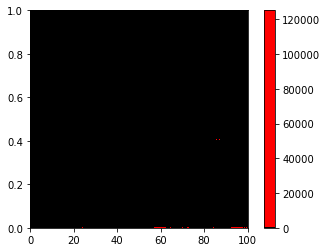

In [12]:
img = plt.imshow(df_numpy, cmap=newcmap, 
                 extent=[0,100,0,1], aspect=100)

plt.colorbar(img, cmap=newcmap)

The following code perfroms the Singular Value Decomposition on the selected data. 

In [13]:
#SVD
U, s, vT = svd(df_numpy)

count = 0 

# this loop finds the amount of values in the sigma matrix and counts
# how many elements are 0.
for i in range(len(s)):
    if s[i] < 0.00001:
        count = count + 1

# this calculation determines the rank of the matrix
# it subtracts the amount of zeros from the number of columns
rank = df_numpy.shape[1] - count
rank

1517

The Rank is 1517.
The following code checks the dimensions of the U matrix.

In [14]:
U.shape

(24057, 24057)

This code dots U with the transpose of U. If U dotted with its transpose is equal to the identity matrix, then the columns of U are orthogonal and normalized.

In [15]:
# This is the dot product between U and U transpose
test = U.dot(np.transpose(U))

# This creates the identity matrix
identity_matrix = np.identity(len(U[:,1]))

# This checks if the identity matrix is equal to the dot product
# between U and U transpose that is calculated and stored in variable
# 'test'
np.allclose(test, identity_matrix, atol=1e-8)

True

U is orthogonal and normalized.

The following code checks the dimensions of the V transpose matrix.

In [16]:
vT.shape

(1517, 1517)

This code dots V transpose with the transpose of V transpose. If V transpose dotted with its transpose is equal to the identity matrix, then the rows of V transpose are orthogonal and normalized.

In [17]:
# This is the dot product between V transpose and the transpose of 
# V transpose
test = vT.dot(np.transpose(vT))

# This creates the identity matrix
identity_matrix = np.identity(len(vT[:,1]))

# This checks if the identity matrix is equal to the dot product
# between V transpose and the transpose of V transpose 
# that is calculated and stored in variable 'test'
np.allclose(test, identity_matrix, atol=1e-08)

True

This computes the singular value decomposition with the rank

In [18]:
#SVD
U, s, vT = svd(df_numpy)

# U matrix with the rank
U = U[:, :rank]

# Creates a vector of 0 with values along the diagonal
sigma = diag(s)

# creates sigma matrix with rank
sigma = sigma[:rank, :rank]
# creates V transpose matrix with rank
VT = vT[:rank, :]

This checks the shape of the U matrix

In [19]:
U.shape

(24057, 1517)

This checks the shape of the sigma matrix

In [20]:
sigma.shape

(1517, 1517)

This checks the shape of the v transpose matrix

In [21]:
VT.shape

(1517, 1517)

Calculates the dot product between U, S, and V transpose and determines if the value is equal to the original matrix.

In [22]:
# U dot with sigma
uDotS = U.dot(sigma)
# The product of U dot with sigma is dotted with V transpose
uDotSDotVt = uDotS.dot(VT)

# Subtract the product of U, sigma, and V transpose 
# from the original matrix
testSVD = np.round(abs(df_numpy - uDotSDotVt))
testSVD = np.matrix(testSVD)
# If the resulting matrix is filled with only zeros, then 
# the product of U, sigma, and V transpose are equal to the 
# original matrix
if (testSVD.all() == 0):
    zero = True
zero

True

The resulting matrix is equal to the matrix of zeros. Therefore, the resulting matrix is equal to the original matrix.

The following code plots matrix U. The green indicates negative values, black is equal to 0, while red indicates positive values.

In [23]:
gBR = ('Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen',
       'Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
gBRmap = LinearSegmentedColormap.from_list("mycmap", gBR)

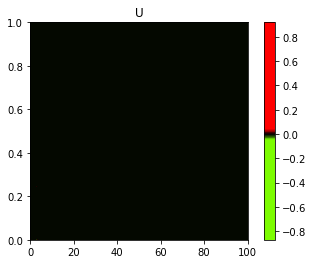

In [24]:
img = plt.imshow(U, cmap=gBRmap, extent=[0,100,0,1], aspect=100)

plt.title("U")
plt.colorbar(img, cmap=gBRmap)

The following code plots matrix VT. The green indicates negative values, black is equal to 0, while red indicates positive values.

In [25]:
gBR2 = ('Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red','Red')
gBRmap2 = LinearSegmentedColormap.from_list("mycmap", gBR2)

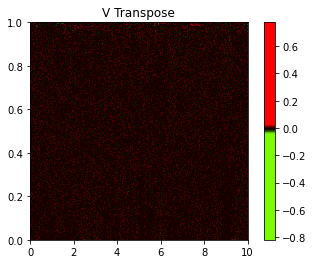

In [26]:
img = plt.imshow(VT, cmap=gBRmap2, extent=[0,10,0,1], aspect=10)

plt.title('V Transpose')
plt.colorbar(img, cmap=gBRmap2)

The following code plots matrix sigma. The green indicates negative values, black is equal to 0, while red indicates positive values.

In [27]:
rBr = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
sigmap = LinearSegmentedColormap.from_list("sigmap", rBr)

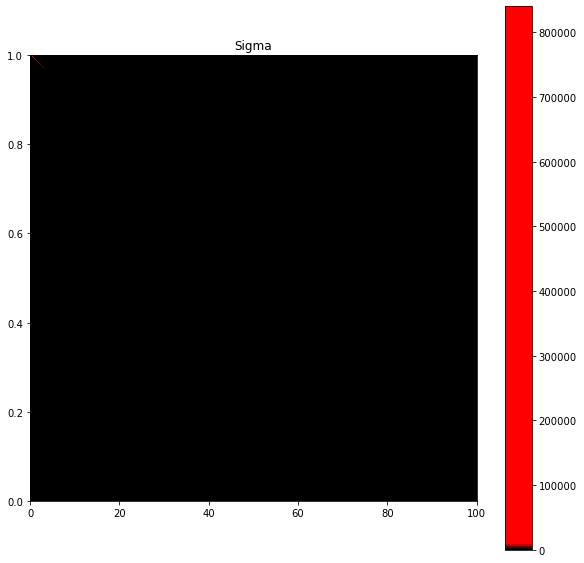

In [28]:
plt.figure(figsize=(10,10))
img = plt.imshow(sigma, cmap=sigmap, extent=[0,100,0,1], aspect=100)

plt.title('Sigma')

plt.colorbar(img, cmap=sigmap)

In [29]:
#selects the excitatory cells
excitatory_meta=cellmeta.loc[cellmeta['major_class']=='Excitatory']

#selects the inhibatory cells
inhib_meta = cellmeta.loc[cellmeta['major_class']=='Inhibitory']

ex_in_meta = pd.DataFrame()

# creates the matrix wiht inhibatory cells and excitatory cells
ex_in_meta = excitatory_meta.append(inhib_meta)

# the following code determines the index that corresponds with
# the excitatory group and the inhibatory group
ex_in_meta
ex_index = excitatory_meta.index
ex_length = len(ex_index) - 1
print("Excitatory is from: 0-", ex_length, "index")

inhib_index = inhib_meta.index
inhib_length = len(inhib_index)
inhib_max_index = ex_length + inhib_length
print("Inhibitatory is from:", ex_length+1, "-", inhib_max_index)

Excitatory is from 0- 755 index
Inhibitatory is from: 756 - 1516


The following code places the Excitatory and Inhibatory cells and their respective genes into a dataframe.

In [30]:
ex_inhib_rpkm =gene_rpkm.loc[ex_in_meta["long_name"]]

ex_inhib_rpkm = ex_inhib_rpkm.apply(pd.to_numeric)

ex_inhib_rpkm = ex_inhib_rpkm.to_numpy()

ex_inhib_rpkm = np.transpose(ex_inhib_rpkm)
ex_inhib_rpkm.shape

(24057, 1517)

The following code creates the colormap for the plots. The colors chosen are lawn green, black, and red. They are placed in this order to assign negative values to green, positive values to red, and near zero values to black.

In [31]:
bR = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
newcmap = LinearSegmentedColormap.from_list("mycmap", bR)

The following code plots the data.

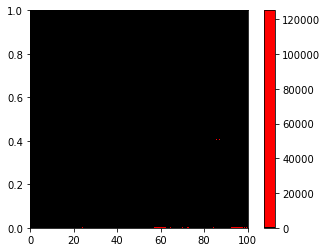

In [32]:
img = plt.imshow(ex_inhib_rpkm, cmap=newcmap, 
                 extent=[0,100,0,1], aspect=100)

plt.colorbar(img, cmap=newcmap)

The following code perfroms the Singular Value Decomposition on the selected data.

In [33]:
#SVD
U, s, vT = svd(ex_inhib_rpkm)

count = 0 

# this loop finds the amount of values in the sigma matrix and counts 
# how many elements are 0.
for i in range(len(s)):
    if s[i] < 0.00001:
        count = count + 1

# this calculation determines the rank of the matrix
# it subtracts the amount of zeros from the number of columns
rank = ex_inhib_rpkm.shape[1] - count
rank

1517

The Rank is 1517.
The following code checks the dimensions of the U matrix.

In [34]:
U.shape

(24057, 24057)

This code dots U with the transpose of U. If U dotted with its transpose is equal to the identity matrix, then the columns of U are orthogonal and normalized.

In [35]:
# This is the dot product between U and U transpose
test = U.dot(np.transpose(U))

# This creates the identity matrix
identity_matrix = np.identity(len(U[:,1]))

# This checks if the identity matrix is equal to the dot product
# between U and U transpose that is calculated and stored in variable
# 'test'
np.allclose(test, identity_matrix, atol=1e-8)

True

U is orthogonal and normalized.

The following code checks the dimensions of the V transpose matrix.

In [36]:
vT.shape

(1517, 1517)

This code dots V transpose with the transpose of V transpose. If V transpose dotted with its transpose is equal to the identity matrix, then the rows of V transpose are orthogonal and normalized.

In [37]:
# This is the dot product between V transpose and the transpose of 
# V transpose
test = vT.dot(np.transpose(vT))

# This creates the identity matrix
identity_matrix = np.identity(len(vT[:,1]))

# This checks if the identity matrix is equal to the dot product
# between V transpose and the transpose of V transpose 
# that is calculated and stored in variable 'test'
np.allclose(test, identity_matrix, atol=1e-08)

True

This computes the singular value decomposition with the rank

In [38]:
#SVD
U, s, VT = svd(ex_inhib_rpkm)

# U matrix with the rank
U = U[:, :rank]

# Creates a vector of 0 with values along the diagonal
sigma = diag(s)

# creates sigma matrix with rank
sigma = sigma[:rank, :rank]
#creates V transpose matrix with rank
VT = VT[:rank, :]

This checks the shape of the U matrix

In [39]:
U.shape

(24057, 1517)

This checks the shape of the sigma matrix

In [40]:
sigma.shape

(1517, 1517)

This checks the shape of the v transpose matrix

In [41]:
VT.shape

(1517, 1517)

Calculates the dot product between U, S, and V transpose and determines if the value is equal to the original matrix.

In [42]:
# U dot with sigma
uDotS = U.dot(sigma)
# The product of U dot with sigma is dotted with V transpose
uDotSDotVt = uDotS.dot(VT)

# Subtract the product of U, sigma, and V transpose 
# from the original matrix
testSVD = np.round(abs(ex_inhib_rpkm - uDotSDotVt))
testSVD = np.matrix(testSVD)
# If the resulting matrix is filled with only zeros, then 
# the product of U, sigma, and V transpose are equal to the 
# original matrix
if (testSVD.all() == 0):
    zero = True
zero

True

The resulting matrix is equal to the matrix of zeros. Therefore, the resulting matrix is equal to the original matrix.

The following code plots martrix VT. The green indicates negative values, black is equal to 0, while red indicates positive values. This colorscheme is created using the LinearSegmentedColormap

In [43]:
gBR2 = ('Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red','Red')
gBRmap2 = LinearSegmentedColormap.from_list("mycmap", gBR2)

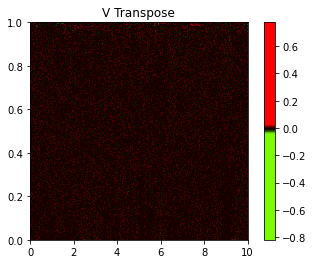

In [44]:
img = plt.imshow(VT, cmap=gBRmap2, extent=[0,10,0,1], aspect=10)

plt.title('V Transpose')
plt.colorbar(img, cmap=gBRmap2)

The following code plots the top 16 patterns in VT. 

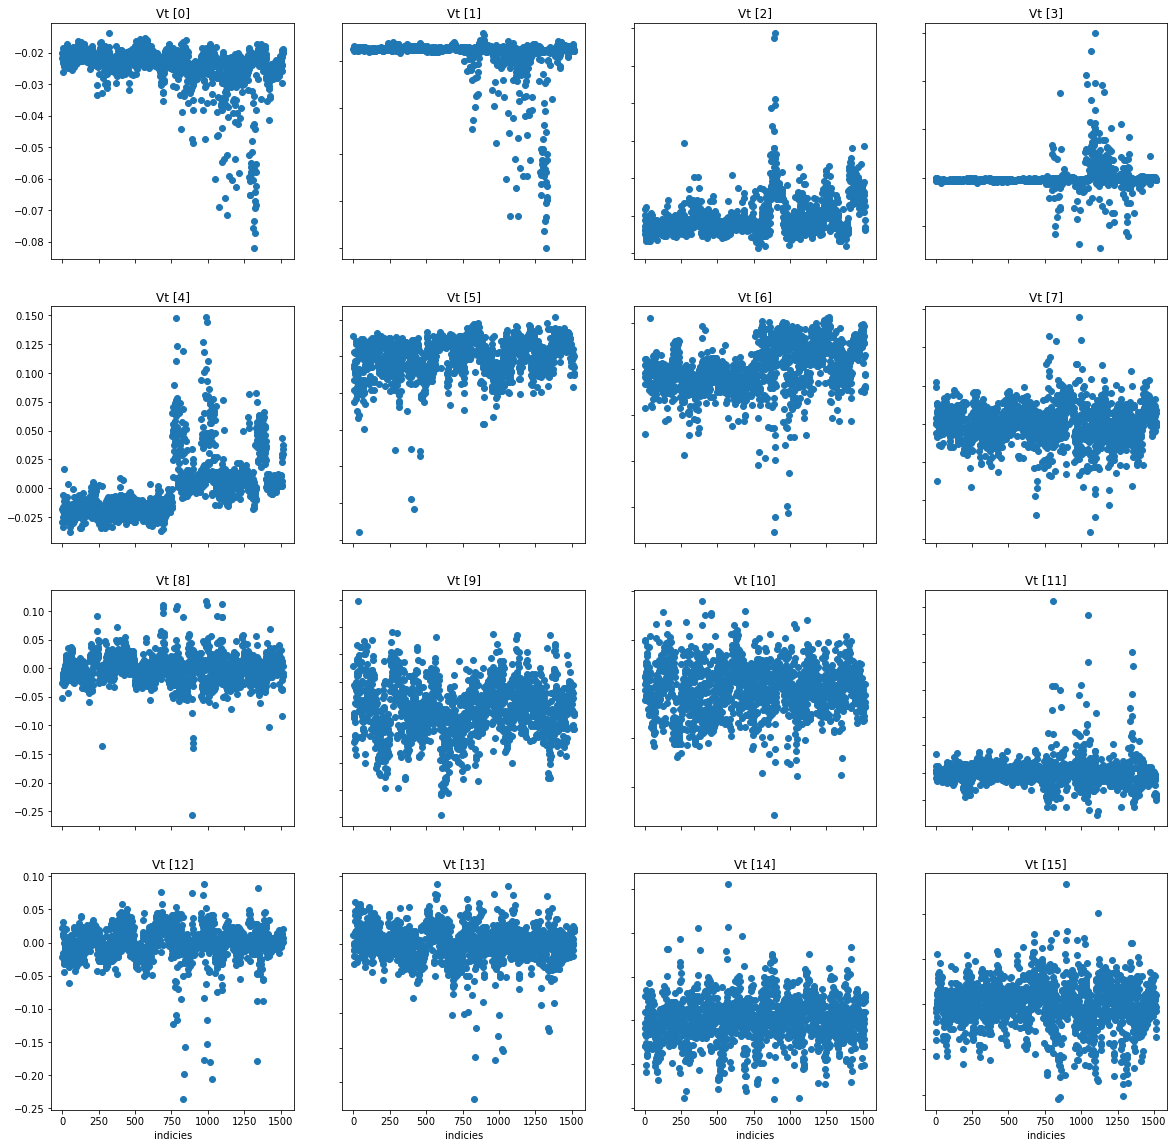

In [45]:
vx = np.arange(0,VT.shape[0],1)

fig, axs = plt.subplots(4, 4, figsize=(20,20), sharex='all')

for i in range(4):
    for k in range(4):
        axs[i, k].scatter(vx, VT[(4*i)+k,:])
        num = str((4*i)+k)
        axs[i, k].set_title('Vt ['+num+']')

# sets the x axis
for ax in axs.flat:
    ax.set(xlabel='indicies')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    

The following finds the Mann-Whitney-Wilcoxon p-value for the gene expression seen in Inhibitatory cells and Excitatory cells in the fourth pattern of VT. 

In [46]:
v4 = VT[4,:]

inhib4 = v4[0:755]
excit4 = v4[756:1516]

stats.mannwhitneyu(inhib4,excit4)

MannwhitneyuResult(statistic=8257.0, pvalue=3.210550053086477e-235)

The following code creates a boxplot for the fourth pattern in VT. It compares the Inhibitatory group and the Excitatory group. 

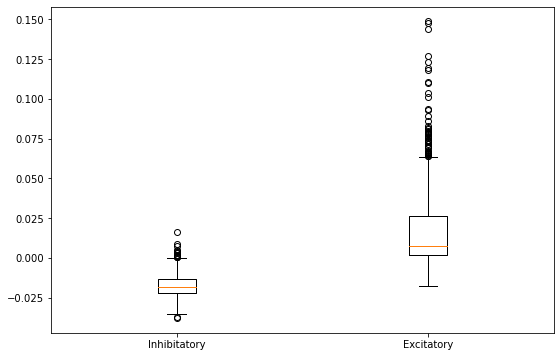

In [47]:
lists = [inhib4,excit4]

fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(lists)

ax = ax.set_xticklabels(['Inhibitatory', 'Excitatory'])

In [70]:
countGroupI = 0 

# this loop finds the amount of values in both groups
# that are below zero
for i in range(len(v4)):
    if v4[i] < 0:
        countGroupI = countGroupI + 1
        
print("The number of values below 0 for both groups:", countGroupI)

countGroupE = 0 

# this loop finds the amount of values in both groups
# that are below zero
for i in range(len(v4)):
    if v4[i] > 0:
        countGroupE = countGroupE + 1
        
print("The number of values above 0 for both groups:", countGroupE)

The number of values below 0 for both groups: 889
The number of values above 0 for both groups: 628


In [71]:
countI = 0 

# this loop finds the amount of values in the inhibitatory group
# that are below zero
for i in range(len(inhib4)):
    if inhib4[i] < 0:
        countI = countI + 1
        
print("The number of values below 0 for Inhibitatory group:", countI)

countE = 0 

# this loop finds the amount of values in the excitatory group
# that are below zero
for i in range(len(excit4)):
    if excit4[i] > 0:
        countE = countE + 1
        
print("The number of values above 0 for Excitatory group:", countE)

The number of values below 0 for Inhibitatory group: 739
The number of values above 0 for Excitatory group: 611


The following code determines the hypergeometric p-value for the inhibitatory group and excitatory group of pattern 4

In [72]:
#Hypergeometric p-value for inhibitatory group pattern 4 
N = len(VT[4,:]) #number of cells
n = countGroupI  #number of cells with below 0 expression value
K = len(inhib4)  #number of inhibitatory cells
#number of inhibitatory cells with below 0 expression value
k = countI

from scipy.stats import hypergeom
pval = hypergeom.sf(k, N, K, n)

print("p-value calculated by python is: ", pval)

p-value calculated by python is:  8.059806754254423e-253


In [73]:
#Hypergeometric p-value for excitatory group pattern 4 
N = len(VT[4,:]) #number of cells
n = countGroupE  #number of cells with above 0 expression value
K = len(excit4)  #number of excitatory cells
#number of excitatory cells with above 0 expression value
k = countE

from scipy.stats import hypergeom
pval = hypergeom.sf(k, N, K, n)

print("p-value calculated by python is: ", pval)

p-value calculated by python is:  6.129702789819613e-252


The hypogeometric p-value is below 0.05e-251 for both groups. 
This means that the chance of these patterns occuring randomly are low.

The following code visualizes the fourth pattern in U. 

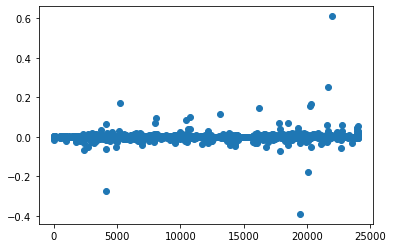

In [74]:
U4 = U[:,4]
Ux = np.arange(0,U.shape[0],1)
plt.scatter(Ux,U4)

The following code maps the gene name to the corresponding values in the fourth pattern of U

In [75]:
gene_names = gene_rpkm.iloc[0]
gene_names.shape

(24057,)

In [81]:
gene_names_map_toU4 = {}

for i in range(U4.shape[0]):
    gene_names_map_toU4[gene_names.index[i]] = U4[i]
    
#gene_names_map_toU4

{'0610005C13Rik': -5.276810987045306e-06,
 '0610007C21Rik': 0.003632215025868841,
 '0610007L01Rik': 3.639228019247136e-05,
 '0610007N19Rik': 2.405243570169964e-05,
 '0610007P08Rik': 1.5928597150498246e-05,
 '0610007P14Rik': 0.0006377139729194038,
 '0610007P22Rik': 0.0005297860725598627,
 '0610008F07Rik': 4.9055118475602684e-17,
 '0610009B14Rik': 2.6966353981360013e-06,
 '0610009B22Rik': 0.0006405423139581197,
 '0610009D07Rik': 0.0024532700816396174,
 '0610009L18Rik': -1.888675790933448e-05,
 '0610009O20Rik': 0.00039260121720890664,
 '0610010B08Rik': 0.0001368950780228338,
 '0610010F05Rik': -0.00014234478538352715,
 '0610010K14Rik': 0.0006227221603062173,
 '0610010O12Rik': -0.001961256847516894,
 '0610011F06Rik': 0.0009070842324884749,
 '0610011L14Rik': -0.0004242224293170454,
 '0610012G03Rik': -6.118492820817412e-05,
 '0610012H03Rik': -3.580932169525202e-07,
 '0610030E20Rik': -7.706994706684785e-07,
 '0610031J06Rik': -8.040889431987523e-05,
 '0610031O16Rik': -1.1853193744900894e-07,
 '

The following code sorts the values of U4

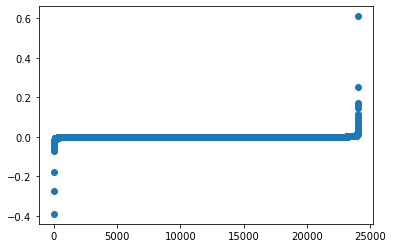

In [82]:
sorted_U4 = np.sort(U4)

plt.scatter(Ux,sorted_U4)

The following code sorts the dictionaries for the fourth pattern in U

In [83]:
#package that allows dictionaries to be sorted
import collections

# sorts the U4 values high to low
od4 = collections.OrderedDict(
    sorted(gene_names_map_toU4.items(), key=lambda x: x[1], reverse = True))

# sorted dictionary with U4 values as the keys 
# and the gene name as the value

In [84]:
#sorts the U4 values low to high
od4_low_to_high = collections.OrderedDict(
    sorted(gene_names_map_toU4.items(), key=lambda x: x[1], reverse = False))

# sorted dictionary with U4 values as the keys and 
# the gene name as the value

In [87]:
#od4

OrderedDict([('Vip', 0.6107005522621279),
             ('Ubb', 0.2516751097985699),
             ('Cnr1', 0.17255647704057558),
             ('Tac2', 0.16728007007937454),
             ('Synpr', 0.15658407931763424),
             ('Penk', 0.14319647134828492),
             ('Mir690', 0.11654692542678045),
             ('Impact', 0.09869907126097992),
             ('Gad1', 0.09743841043145315),
             ('Hspa8', 0.08608006017346788),
             ('Resp18', 0.07121517668734828),
             ('Scg2', 0.06960961654848587),
             ('Fxyd6', 0.06903242489640152),
             ('Calb2', 0.06427125823321488),
             ('Zcchc12', 0.061990114963309306),
             ('Tubb2a', 0.058436540419715854),
             ('mt_GU332589', 0.05533207433582391),
             ('Slc6a1', 0.04556722422891659),
             ('mt_AF378830', 0.044031832114584314),
             ('mt_AK140265', 0.04237273491672589),
             ('Inpp5f', 0.03960826495920636),
             ('Rgs10', 0.039145857528

In [88]:
#od4_low_to_high

OrderedDict([('Snap25', -0.3910514468756999),
             ('Calm2', -0.2758441253693865),
             ('Stmn1', -0.17665256922030007),
             ('Rgs4', -0.07154817777351832),
             ('Actb', -0.06876980123495056),
             ('Calm1', -0.06398803177639234),
             ('Ywhah', -0.05513996161707886),
             ('Aldoa', -0.05247925076927048),
             ('Tagln3', -0.05214048710211644),
             ('Chn1', -0.051691158522626235),
             ('Ppia', -0.04969987182421988),
             ('Nrn1', -0.04892550783058054),
             ('Enc1', -0.04407287024947581),
             ('Schip1', -0.04369108742294546),
             ('Ndrg3', -0.03980988137824019),
             ('Ldha', -0.03907019261966947),
             ('Tmsb4x', -0.0388133453544164),
             ('Npy', -0.03835191749615215),
             ('Pcp4', -0.0314804321832493),
             ('Malat1', -0.031199632329217727),
             ('Snca', -0.03106758528264423),
             ('c17_SSU-rRNA_Hsa', -0.03086

In [72]:
ordered_gene_to_U4_keys = list(od4.keys())
df_U4 = pd.DataFrame(ordered_gene_to_U4_keys)
df_U4.to_csv('df_U4.csv')

In [73]:
ordered_gene_to_U4_keys_lth = list(od4_low_to_high.keys())
df_U4 = pd.DataFrame(ordered_gene_to_U4_keys_lth)
df_U4.to_csv('df_U4_lth.csv')

### The functions, processes and components that were determined to be most significant by Gorilla

U4 process high to low (excitatory):
cytoplasmic translation                              2.73E-18  12.14 (21249,38,1013,22)
NADH dehydrogenase complex assembly                  1.68E-16  7.69 (21249,46,1562,26)
mitochondrial respiratory chain complex I assembly   1.68E-16  7.69 (21249,46,1562,26)
mitochondrial ATP synthesis coupled proton transport 2.96E-10  47.28 (21249,13,242,7) 
energy coupled proton transport                      4.18E-10  10.66 (21249,18,1329,12)
ATP synthesis coupled proton transport               4.18E-10  10.66 (21249,18,1329,12)
oxidative phosphorylation                            4.91E-9   10.73 (21249,19,1147,11)

U4 function high to low (excitatory):
proton-transporting ATP synthase activity, rotational mechanism 1.9E-12 39.23 (21249,15,325,9)
NADH dehydrogenase activity                          7.68E-11  10.98 (21249,21,1198,13)
glutamate decarboxylase activity                     7.07E-6   372.79 (21249,2,57,2)

U4 component high to low (excitatory):	
respiratory chain complex                            3.32E-26  8.88 (21249,69,1318,38)
mitochondrial proton-transporting ATP synthase complex  4.2E-10 9.39 (21249,15,1810,12)

U4 process low to high (inhibatory):
synaptic signaling                                   1.65E-15  2.95 (21249,275,1935,74)
trans-synaptic signaling                             2.04E-15  2.97 (21249,270,1935,73)
regulation of postsynapse organization               5.43E-16  5.04 (21249,132,1278,40)
regulation of neurotransmitter secretion             1.84E-14  3.38 (21249,133,2314,49)
anterograde trans-synaptic signaling                 2.21E-14  2.75 (21249,249,2139,69)
chemical synaptic transmission                       2.21E-14  2.75 (21249,249,2139,69)
vesicle-mediated transport in synapse                2.54E-14  4.35 (21249,129,1440,38)
regulation of synaptic vesicle exocytosis            6.79E-14  3.78 (21249,102,2314,42)
regulation of synaptic vesicle transport             9.05E-14  3.69 (21249,107,2314,43)
regulation of dendritic spine morphogenesis          1.73E-13  4.99 (21249,55,2244,29)
regulation of regulated secretory pathway            2.54E-13  2.89 (21249,190,2244,58)
presynaptic endocytosis                              4.58E-9   7.76 (21249,48,856,15)
synaptic vesicle endocytosis                         4.58E-9   7.76 (21249,48,856,15)

U4 function low to high (inhibatory):
structural constituent of synapse                    5.74E-13  7.00 (21249,30,2025,20)
structural constituent of cytoskeleton               3.78E-11  5.12 (21249,64,1622,25)
translation initiation factor activity               4.14E-9   4.73 (21249,47,2007,21)
structural constituent of postsynapse                1.57E-7   6.65 (21249,20,1916,12)

U4 component low to high (inhibatory):
glutamatergic synapse                                4.53E-54  3.49(21249,505,2244,186)
neuron spine                                         3.59E-24  4.37 (21249,188,1734,67)
dendritic spine                                      3.76E-24  4.42 (21249,183,1734,66)
Schaffer collateral - CA1 synapse                    9.11E-21  4.47 (21249,113,2231,53)


#### Picture from the Gorilla Results for Process (High to Low)

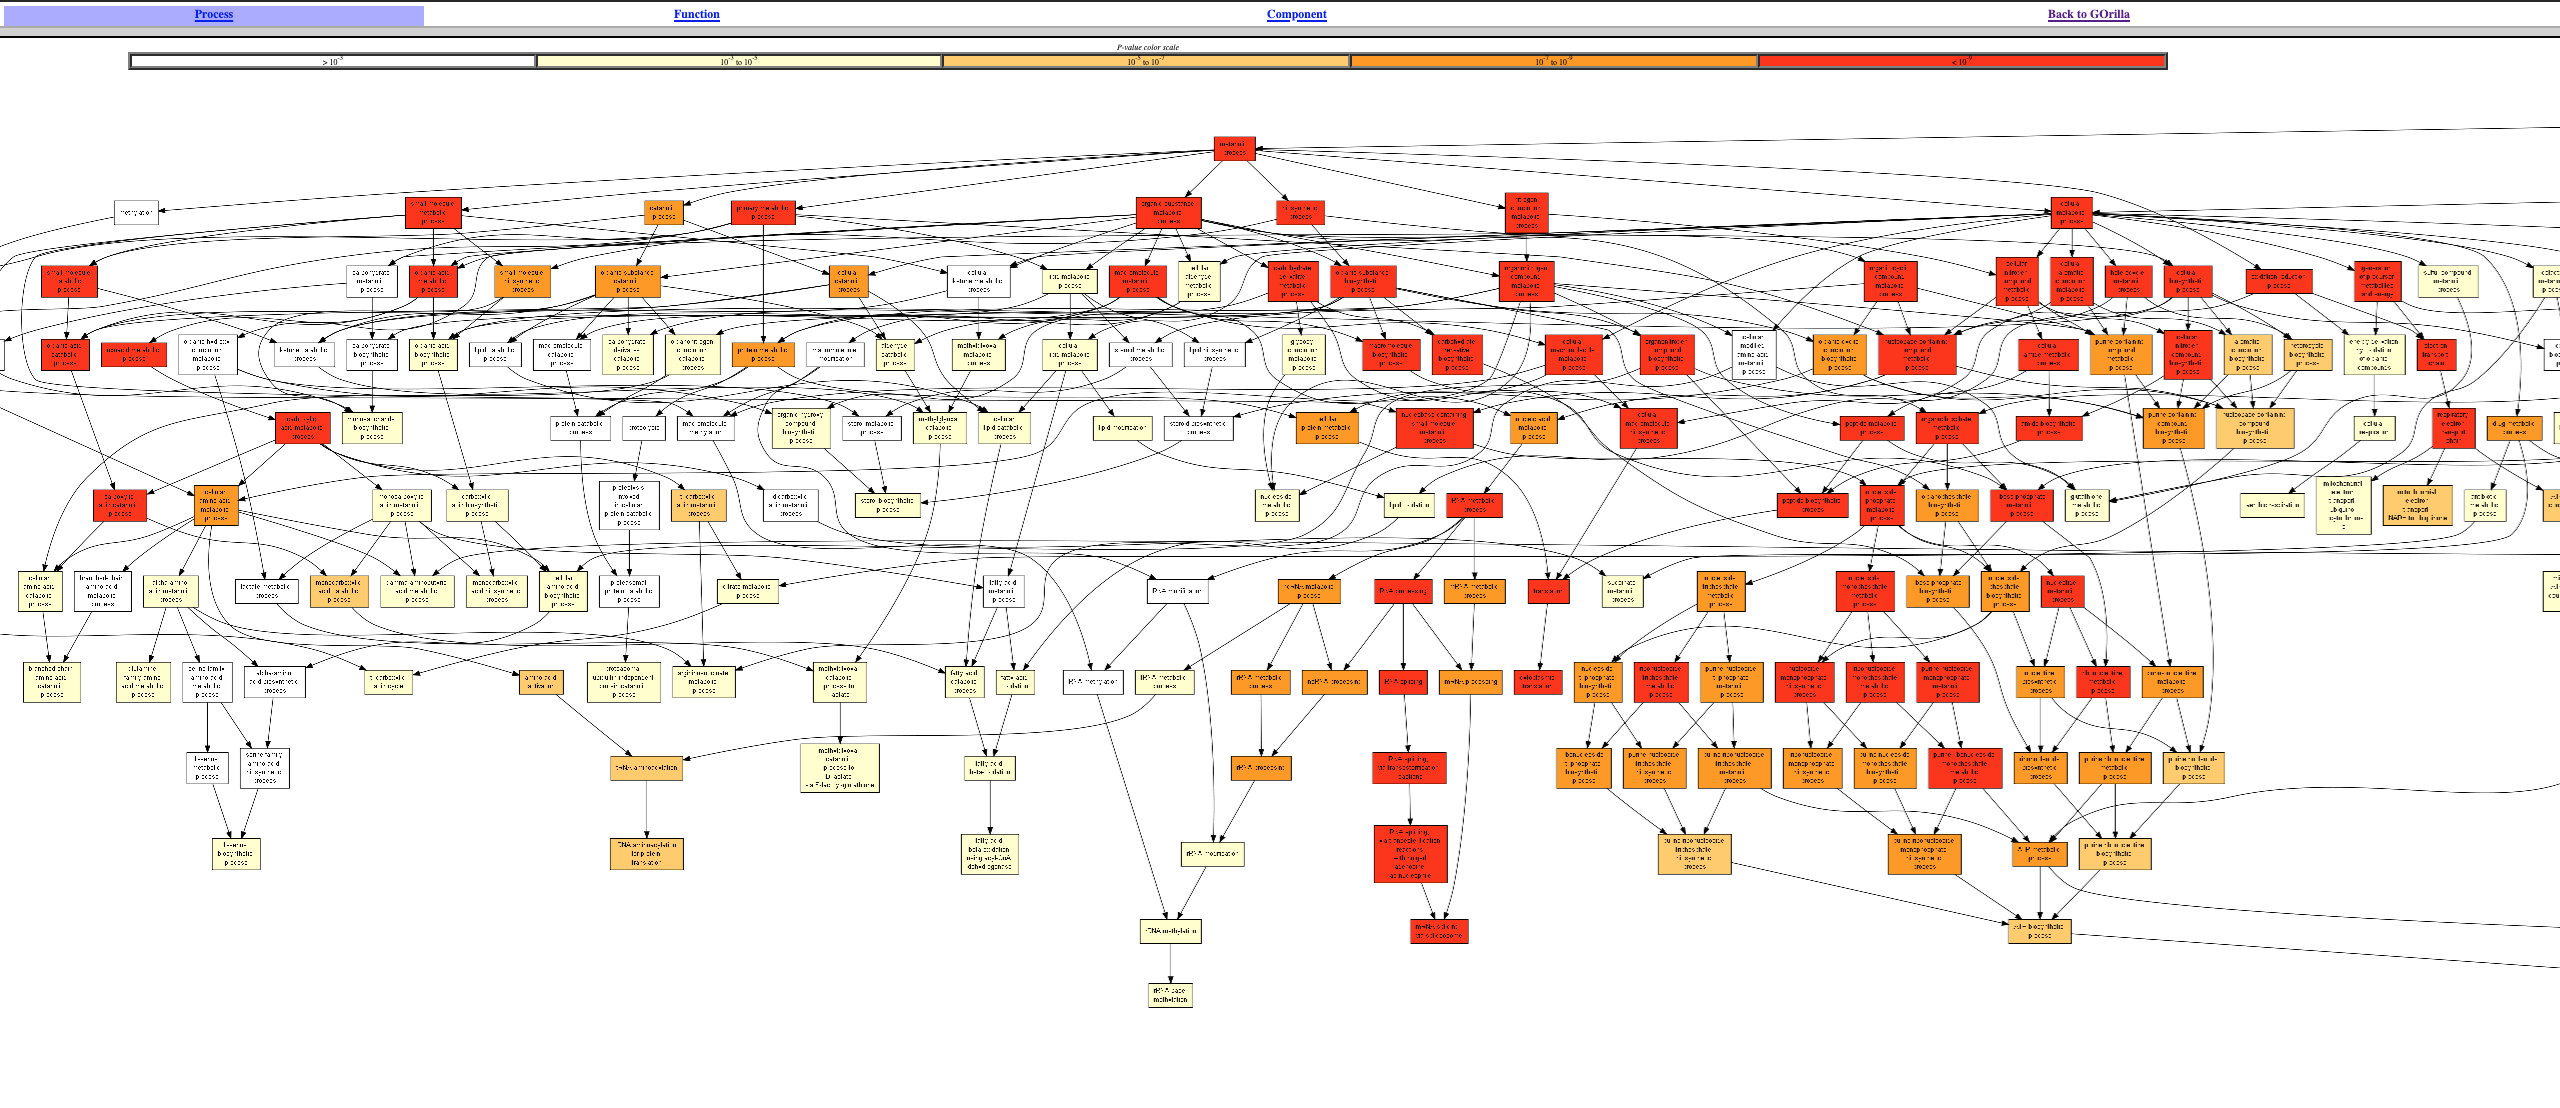

In [89]:
from IPython.display import Image
Image("/Users/markomiholjcic/Documents/GitHub/DataScienceBME6900Project/alan brain atlas data/HightoLow.png")

#### Picture from the Gorilla Results for Process (Low to High)

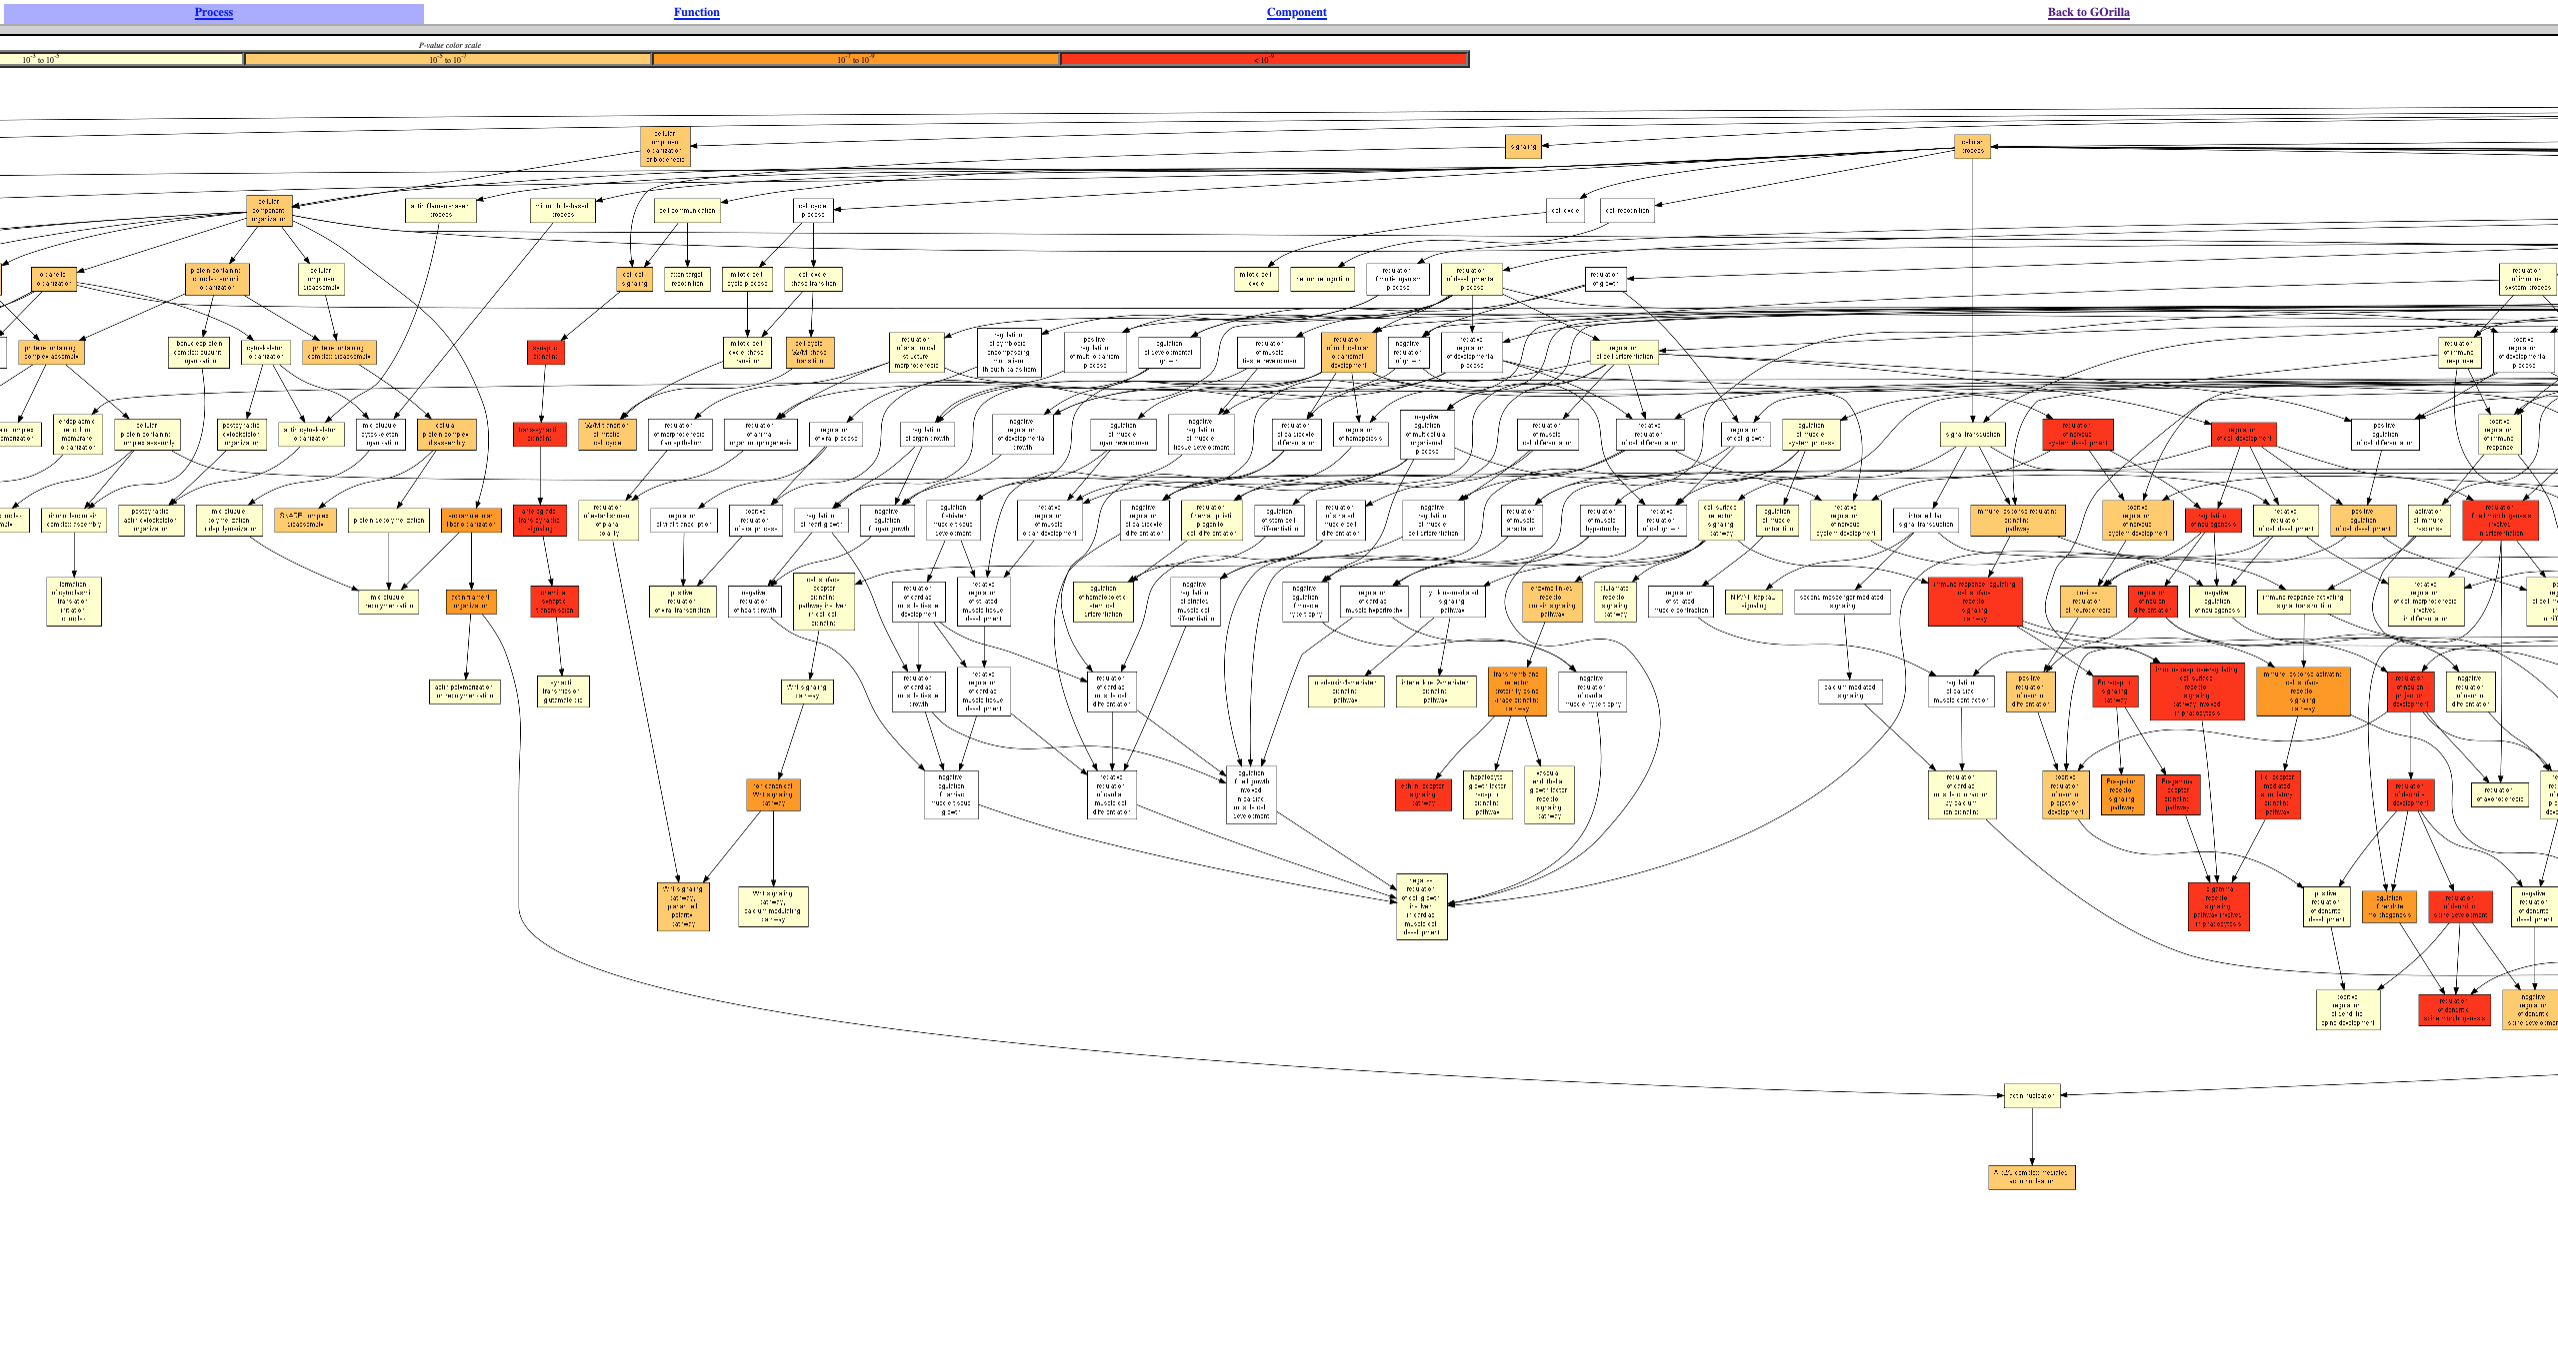

In [91]:
Image("/Users/markomiholjcic/Documents/GitHub/DataScienceBME6900Project/alan brain atlas data/LowtoHigh.png")
